Data Loading and Understanding

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("ipl_matches.csv")

In [2]:
df.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
print("Rows & Columns:", df.shape)

Rows & Columns: (756, 18)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [6]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

2. Data Cleaning

In [9]:
# Drop rows where winner is not there
df = df.dropna(subset=['winner'])

In [10]:
# Filling remaining missing values
df.fillna("Unknown", inplace=True)

In [11]:
# Removing unwanted columns
drop_cols = [
    'id', 'umpire1', 'umpire2', 'player_of_match',
    'win_by_runs', 'win_by_wickets'
]

df.drop(columns=drop_cols, errors='ignore', inplace=True)

In [12]:
# Categorical Feature
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [13]:
# IQR 
# Identify numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Remove outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [14]:
df.shape

(611, 12)

In [15]:
df.head

<bound method NDFrame.head of      Season  city  date  team1  team2  toss_winner  toss_decision  result  \
0         9    14    59     14     13           13              1       0   
1         9    26    75      8     11           11              1       0   
2         9    28    90      4      7            7              1       0   
3         9    15   109     11      5            5              1       0   
4         9     2   109     13      3           13              0       0   
..      ...   ...   ...    ...    ...          ...            ...     ...   
632       8     2   444      4     13           13              1       0   
633       8    10   462     14      7            7              1       0   
634       8    10   496      4     14           14              1       0   
635       8     2   526     14     13           14              0       0   
753      11    32   122     14      2            2              1       0   

     dl_applied  winner  venue  umpire3  
0  

3. Exploratory Data Analysis [EDA]

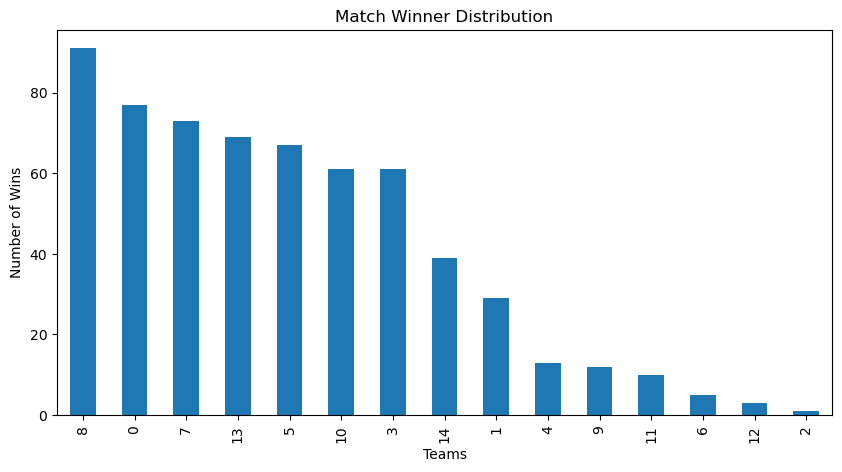

In [16]:
# Winner
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
df['winner'].value_counts().plot(kind='bar')
plt.title("Match Winner Distribution")
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.show()

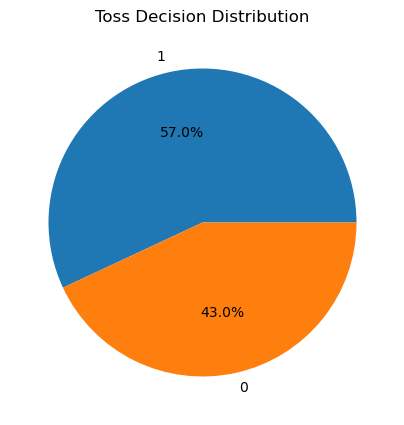

In [17]:
# Toss Decission
plt.figure(figsize=(5,5))
df['toss_decision'].value_counts().plot(
    kind='pie', autopct='%1.1f%%'
)
plt.title("Toss Decision Distribution")
plt.ylabel("")
plt.show()

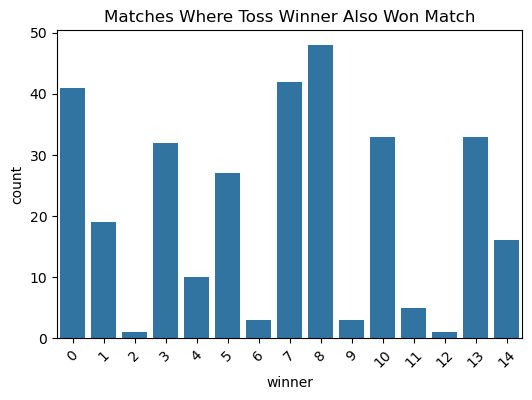

In [18]:
# Toss winner & Winner
toss_win_match_win = df[df['toss_winner'] == df['winner']]

plt.figure(figsize=(6,4))
sns.countplot(x=toss_win_match_win['winner'])
plt.title("Matches Where Toss Winner Also Won Match")
plt.xticks(rotation=45)
plt.show()

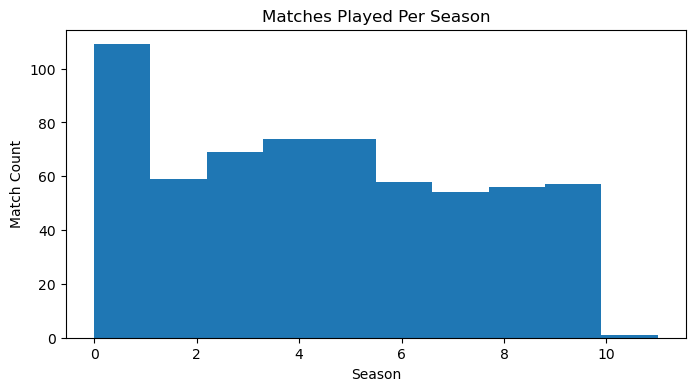

In [19]:
# Match Count
plt.figure(figsize=(8,4))
plt.hist(df['Season'], bins=10)
plt.title("Matches Played Per Season")
plt.xlabel("Season")
plt.ylabel("Match Count")
plt.show()

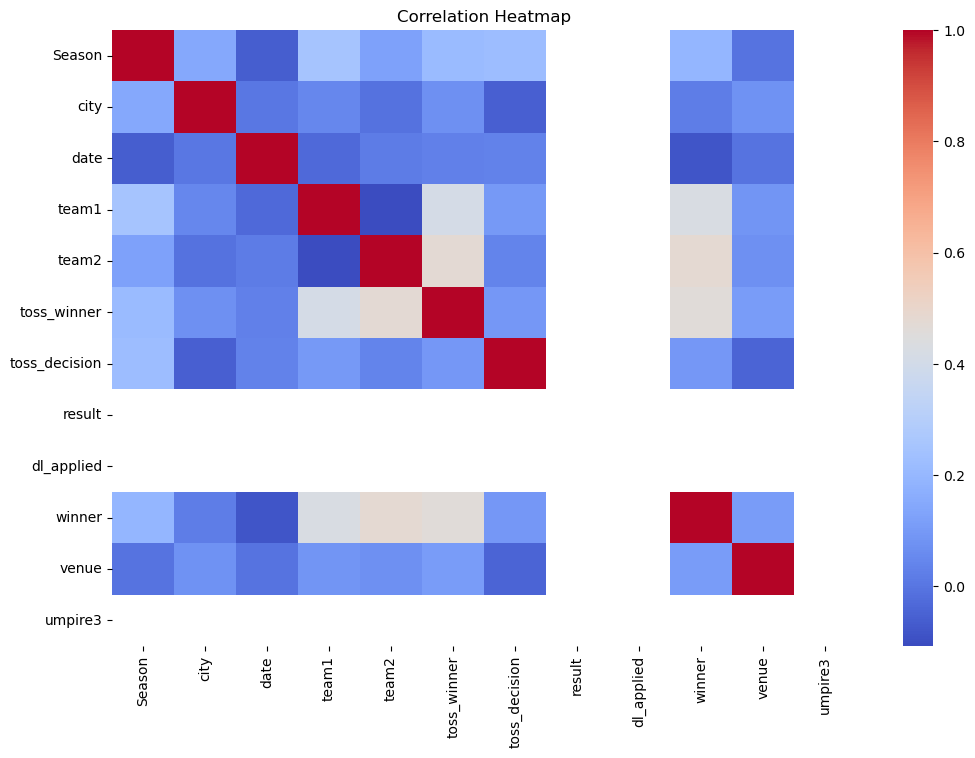

In [20]:
# Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

4. Data Preprocessing

In [21]:
# Splitting Dataset(Training And Testing)
X = df.drop('winner', axis=1)
y = df['winner']

In [22]:
# 80% Train, 20% Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (488, 11)
Testing set shape: (123, 11)


5. Model Training

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Optional XGBoost
try:
    from xgboost import XGBClassifier
    xgb_available = True
except:
    xgb_available = False

# MODEL INITIALIZATION
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

if xgb_available:
    models["XGBoost"] = XGBClassifier(
        use_label_encoder=False,
        eval_metric="mlogloss"
    )

# MODEL TRAINING
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully")

Logistic Regression trained successfully
SVM trained successfully
KNN trained successfully
Decision Tree trained successfully
Random Forest trained successfully


C:\Users\sowmiya\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:42:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained successfully


6. Model Evaluation

In [26]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# MODEL EVALUATION
results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append([name, acc, prec, rec, f1])

    print(f"\n{name}")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1 Score :", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# COMPARISON TABLE
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

print("\nMODEL COMPARISON TABLE")
print(results_df)


best_model = results_df.loc[results_df["Accuracy"].idxmax()]
print("\nBEST PERFORMING MODEL")
print(best_model)


Logistic Regression
Accuracy : 0.2682926829268293
Precision: 0.2665437632576302
Recall   : 0.2682926829268293
F1 Score : 0.24740905788304984
Confusion Matrix:
 [[8 0 0 0 3 0 1 3 0 2 0 0 0]
 [2 0 0 0 1 0 0 1 0 1 0 1 0]
 [7 0 1 0 1 0 1 2 0 0 0 1 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0]
 [1 1 0 0 2 0 1 2 0 2 0 1 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [1 0 0 1 2 0 5 3 0 0 0 1 0]
 [3 0 0 1 1 0 5 6 0 2 0 3 0]
 [1 0 1 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 2 0 1 5 0 4 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 1 0 6 0 4 2]
 [0 0 0 0 0 0 0 1 0 0 0 3 3]]

SVM
Accuracy : 0.37398373983739835
Precision: 0.34064328629495133
Recall   : 0.37398373983739835
F1 Score : 0.3472112703574636
Confusion Matrix:
 [[12  0  2  0  0  0  0  2  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 4  0  6  0  1  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 1  1  0  0  2  0  1  1  0  2  0  2  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  7  2  0  0  0  1  1]
 [ 1  0  1  0  1  0 

7. Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(random_state=42)


param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

# EVALUATION
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Tuned Random Forest Accuracy:", accuracy)

C:\Users\sowmiya\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.5284552845528455


8. Model Comparison

In [28]:
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score

# MODEL COMPARISON
comparison_df = results_df.copy()
print("Model Comparison:")
print(comparison_df)


final_model = best_rf_model
final_accuracy = accuracy_score(y_test, final_model.predict(X_test))

print("\nFinal Selected Model: Random Forest")
print("Final Model Accuracy:", final_accuracy)


with open("ipl_final_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

print("\nFinal model saved as 'ipl_final_model.pkl'")

Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.268293   0.266544  0.268293  0.247409
1                  SVM  0.373984   0.340643  0.373984  0.347211
2                  KNN  0.243902   0.241347  0.243902  0.233976
3        Decision Tree  0.414634   0.424744  0.414634  0.409597
4        Random Forest  0.487805   0.510520  0.487805  0.479026
5              XGBoost  0.536585   0.540954  0.536585  0.522738

Final Selected Model: Random Forest
Final Model Accuracy: 0.5284552845528455

Final model saved as 'ipl_final_model.pkl'
